In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from scipy import optimize
from consav import linear_interp

# load the DurableConsumptionModel module
from HousingModel import HousingModelClass

# Set the number of threads in numba
nb.set_num_threads(3)

Notebook to test run any model, plot policy functions and simulation results

In [33]:
# Define the model
model = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'do_print':False})

# Define parameter values here
# ..
# ..

# Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

# model.solve_path()
# model.simulate_path()

In [191]:
model = HousingModelClass(name='example_negm',par={'solmethod':'negm', 'do_print':False})

In [24]:
model.solve()

In [156]:
model.simulate()

In [151]:
model.par.p_mat

array([[0.67, 0.33],
       [0.33, 0.67]])

In [44]:
np.max(model.sol.d_adj[0,0,1,:])

0.0

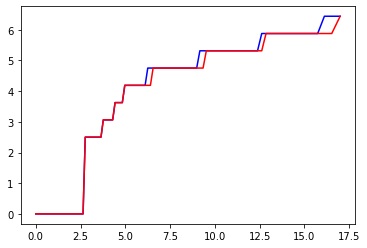

In [34]:
# plt.plot(model.par.grid_x,model.sol.d_adj[0,0,1,:], color = 'blue')
# plt.plot(model.par.grid_x,model.sol.d_adj[0,0,0,:], color = 'red')

plt.plot(model.par.grid_x,model.sol.d_adj[0,0,1,:], color = 'blue')
plt.plot(model.par.grid_x,model.sol.d_adj[0,0,0,:], color = 'red')

# plt.plot(model.par.grid_x,model.sol.inv_v_keep[0,0,1,9,:], color = 'blue', linestyle = ':')
# plt.plot(model.par.grid_x,model.sol.inv_v_keep[0,0,0,9,:], color = 'red', linestyle = ':')

# plt.plot(model.par.grid_x,model.par.grid_x, linestyle = '--')

0.0027851491899220093

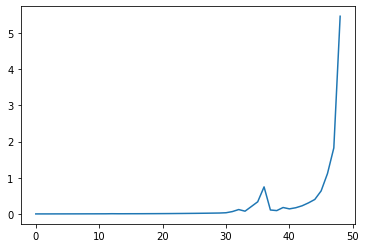

In [35]:
plt.plot(model.sol.dist)
model.sol.dist[0]

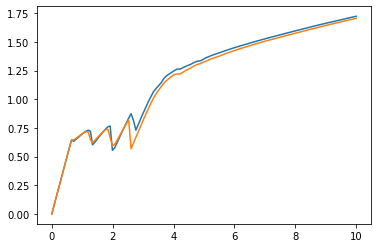

In [36]:
plt.plot(model.par.grid_m,model.sol.c_keep[0,0,1,0,:])
plt.plot(model.par.grid_m,model.sol.c_keep[0,0,0,0,:])

In [20]:
model.simulate()

Traceback (most recent call last):
  File "C:\Users\madsh\OneDrive - University of Copenhagen\Desktop\Thesis\code\MA_thesis\HousingModel.py", line 476, in simulate
    simulate.monte_carlo(sim,sol,par,path=False)
  File "C:\Users\madsh\anaconda3\lib\site-packages\numba\core\dispatcher.py", line 468, in _compile_for_args
    error_rewrite(e, 'typing')
  File "C:\Users\madsh\anaconda3\lib\site-packages\numba\core\dispatcher.py", line 409, in error_rewrite
    raise e.with_traceback(None)
numba.core.errors.TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'optimal_choice': Cannot determine Numba type of <class 'function'>

File "simulate.py", line 92:
def monte_carlo(sim,sol,par,path=False):
    <source elided>

@njit
^



TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'optimal_choice':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "simulate.py", line 92:[0m
[1mdef monte_carlo(sim,sol,par,path=False):
    <source elided>

[1m@njit
[0m[1m^[0m[0m
[0m

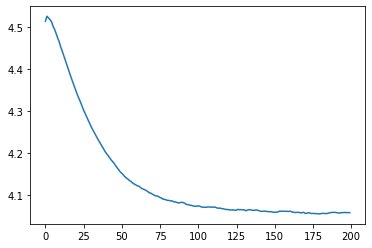

In [38]:
plt.plot(np.mean(model.sim.d, axis=1))

## Plot policy functions

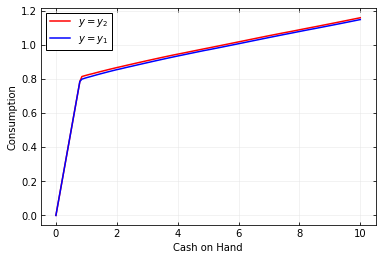

In [39]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,1,5,:], color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_m, model.sol.c_keep[0,0,0,5,:], color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# ax.plot(model.par.grid_m, model.sol.inv_v_keep[0,0,1,5,:], color = 'red', linewidth = '1.5', label = r'$y=y_2$')
# ax.plot(model.par.grid_m, model.sol.inv_v_keep[0,0,0,5,:], color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Consumption')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

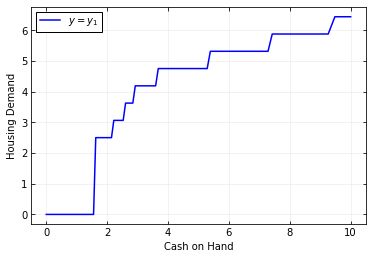

In [189]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
# ax.plot(model.par.grid_m, model.sol_path.d_adj[0,0,1,:], linestyle = '--', color = 'red', linewidth = '1.5', label = r'$y=y_2$')
ax.plot(model.par.grid_m, model.sol.d_adj[0,0,1,:], linestyle = '-', color = 'blue', linewidth = '1.5', label = r'$y=y_1$')

# ax.scatter(model.par.grid_m, model.sol.d_adj[0,0,1,:])


# Plot setting
ax.set_xlabel('Cash on Hand')
ax.set_ylabel('Housing Demand')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

# plt.savefig('../../tex/figs/h_adj.pdf')

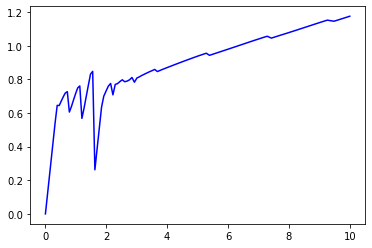

In [176]:
# plt.plot(model.par.grid_m, model.sol_path.d_adj[0,0,0,:], linestyle = '-', color = 'red', linewidth = '1.5')
# plt.plot(model.par.grid_m, model.sol_path.d_adj[0,0,1,:], linestyle = '-', color = 'blue', linewidth = '1.5')

# plt.plot(model.par.grid_m, model.sol.c_adj[0,1,0,:], linestyle = '-', color = 'red', linewidth = '1.5')
plt.plot(model.par.grid_m, model.sol.c_adj[0,0,1,:], linestyle = '-', color = 'blue', linewidth = '1.5')

# plt.plot(model.par.grid_m, model.sol.inv_v_adj[0,1,0,:], linestyle = '--', color = 'red', linewidth = '1.5')
# plt.plot(model.par.grid_m, model.sol.inv_v_adj[0,0,1,:], linestyle = '--', color = 'blue', linewidth = '1.5')

## Plot simulation

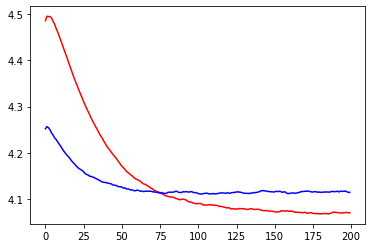

In [35]:
plt.plot(np.mean(model.sim.d, axis=1), color = 'red')
plt.plot(np.mean(model.sim_path.d, axis=1), color = 'blue')

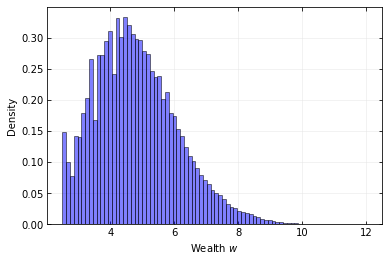

In [167]:
# Define wealth
w_ss = model.sim.a + model.par.ph*model.sim.d
# w_ss2 = model.sim_path.a + model.par.ph*model.sim_path.d

# w = model.sim.a

# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(w_ss[-1,:], bins = 80, density = True, edgecolor = 'k', zorder=2, alpha = .5, color = 'blue')
# ax.hist(w_ss2[-1,:], bins = 80, density = True, edgecolor = 'k', zorder=2, alpha = .5, color = 'green')

# Plot setting
ax.set_xlabel('Wealth $w$')
ax.set_ylabel('Density')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/w_distr.pdf')

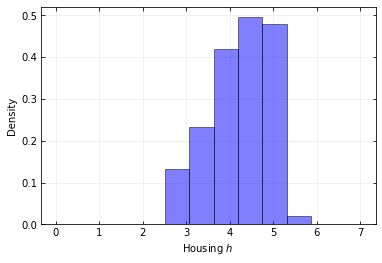

In [168]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.hist(model.sim.d[-1,:], bins = model.par.grid_n, density = True, facecolor='blue', edgecolor = 'k', zorder=2, alpha = .5)
# ax.hist(model.sim_path.d[-1,:], bins = model.par.grid_n, density = True, facecolor='green', edgecolor = 'k', zorder=2, alpha = .5)

# Plot setting
ax.set_xlabel('Housing $h$')
ax.set_ylabel('Density')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
plt.show()

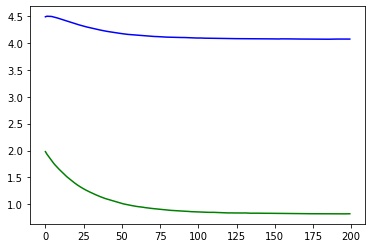

In [9]:
plt.plot(np.mean(model.sim.d, axis=1), color = 'blue')
plt.plot(np.mean(model.sim.a, axis=1), color = 'green')